In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()
data = "Sujalam suphalam malayaja sheetalam\nShasyashyamalam maataram, vande\nSujalam suphalam malayaja sheetalam\nShasyashyaamalam maataram, vande maataram\nShubhra jyotsna pulakitayaaminim\nPhulla kusumita drumadalashobhinim\nSuhaasinim sumadhurabhaashhinim\nSukhadaam varadaam maataram\nSapta koti kantha kalakalaninaada karale\nNisapta koti bhujaidhruta karakarvale\nSapta koti kantha kalakalaninaada karale\nNisapta koti bhujaidhruta karakarvale\nAbalakeno maa eto bale\nBahubaladhaarinim namaami tarinim\nRipudalavarinim maataram, vande maataram\nTvam hi durga dashapraharanadhaarini\nKamala kamaladala vihaarini\nVaani vidyaadaayini, namaami tvam\nNamaami kamalam amalam atulam\nSujalam suphalam maataram\nShyamalam saralam susmitam bhooshhitam\nDharinim bharanim maataram, vande maataram"
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [4]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 50)             2650      
_________________________________________________________________
lstm (LSTM)                  (None, 4, 150)            120600    
_________________________________________________________________
dropout (Dropout)            (None, 4, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 26)                2626      
_________________________________________________________________
dense_1 (Dense)              (None, 53)                1431      
Total params: 227,707
Trainable params: 227,707
Non-trainable params: 0
__________________________________________________

In [9]:
history = model.fit(predictors, label, epochs=200, verbose=1)

Train on 60 samples
Epoch 1/200
60/60 [==============================] - 0s 609us/sample - loss: 2.9368 - accuracy: 0.2167
Epoch 2/200
60/60 [==============================] - 0s 826us/sample - loss: 2.8977 - accuracy: 0.2333
Epoch 3/200
60/60 [==============================] - 0s 772us/sample - loss: 2.8566 - accuracy: 0.2333
Epoch 4/200
60/60 [==============================] - 0s 2ms/sample - loss: 2.8394 - accuracy: 0.2667
Epoch 5/200
60/60 [==============================] - 0s 918us/sample - loss: 2.8157 - accuracy: 0.2667
Epoch 6/200
60/60 [==============================] - 0s 986us/sample - loss: 2.7858 - accuracy:

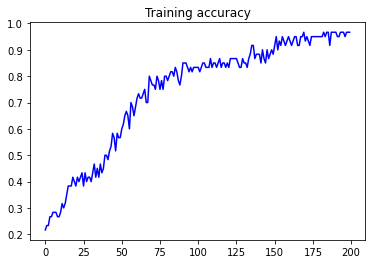

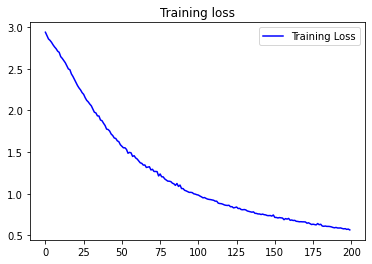

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "Sujalam suphalam malayaja sheetalam"
next_words = 40

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)


Sujalam suphalam malayaja sheetalam sheetalam atulam dashapraharanadhaarini karakarvale karakarvale bhujaidhruta karale karale kalakalaninaada karale karakarvale karakarvale karakarvale bhujaidhruta karakarvale karale kalakalaninaada karale karakarvale karakarvale karakarvale bhujaidhruta karakarvale karale kalakalaninaada karale karakarvale karakarvale karakarvale bhujaidhruta karakarvale karale kalakalaninaada karale karakarvale karakarvale karakarvale bhujaidhruta karakarvale karale
